These exercises are part of practice in Chaperter 6 "Machine Learning", of online courses "Become a data scientist" [www.dataquest.io](https://www.dataquest.io/) 

- ### K-NN principle demonstration
- ### sklearn.neighbors.KNeighborsRegressor 
<i> any difference from sklearn.neighbors.KNeighborsClassifier ? <i> 
- ### optimization with hyper-parameters
- ### cross valiation, manually and with module 
<i> sklearn.model_selection.cross_val_score, & KFold <i>

# K-NN
k-nearest neighbors

In [5]:
import pandas as pd
import numpy as np

In [35]:
dc_listing = pd.read_csv('../../../dataquest/datafile/6-1-1-dc_airbnb.csv')
dc_listing.iloc[0]

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object

## Cleaning price data 

In [36]:
stripped_commas = dc_listing['price'].str.replace(',', '')
#stripped_commas = dc_listing['price'].apply(lambda x: x.replace(',', '')) # either of the 2 lines work
stripped_dollars = stripped_commas.str.replace('$','')
dc_listing['price'] = stripped_dollars.astype('float')
dc_listing['price'][0:5]

0    160.0
1    350.0
2     50.0
3     95.0
4     50.0
Name: price, dtype: float64

## k-nn principle demonstration with k=5
using "price" with variable of "accommodates"

In [38]:
np.random.seed(1)
dc_listing = dc_listing.loc[np.random.permutation(len(dc_listing))]

In [39]:
def predict_price(accommodates):
    temp_df = dc_listing.copy()
    temp_df['distance'] = dc_listing['accommodates'].apply(lambda x: np.abs(x - accommodates))
    temp_df = temp_df.sort_values('distance')
    neighbors = temp_df['price'].iloc[0:5]
    return np.mean(neighbors)

print(predict_price(1))
print(predict_price(2))
print(predict_price(4))

68.0
112.8
124.8


## pd.apply for whole series

In [40]:
# dc_listing already randomly mixed !!!
train_df = dc_listing[:2792]
test_df = dc_listing[2792:]

def predict_price(accommodates):
    temp_df = train_df.copy()
    temp_df['distance'] = train_df['accommodates'].apply(lambda x: np.abs(x - accommodates))
    temp_df = temp_df.sort_values('distance')
    neighbors = temp_df['price'].iloc[0:5]
    return np.mean(neighbors)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)
test_df.head()

C:\Users\huang\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
511,98%,52%,49,2,Private room,1.0,1.0,1.0,225.0,NaN,NaN,2,14,0,38.907871,-77.031629,Washington,20005,DC,117.6
3597,100%,92%,1,4,Entire home/apt,0.0,1.0,2.0,135.0,$35.00,$100.00,2,29,64,38.890416,-76.989529,Washington,20002,DC,184.6
2436,100%,40%,2,1,Shared room,1.0,1.0,1.0,45.0,NaN,NaN,1,14,39,38.920830,-77.039865,Washington,20009,DC,97.8
731,99%,89%,25,5,Entire home/apt,0.0,1.0,1.0,115.0,$85.00,$300.00,3,1125,15,38.907077,-77.079914,Washington,20007,DC,195.8
2220,64%,100%,2,4,Entire home/apt,2.0,1.0,2.0,149.0,$75.00,NaN,1,1125,8,38.895042,-76.989805,Washington,20002,DC,184.6


## Multivariate K-nn

## Data preparation

In [30]:
from sklearn.neighbors import KNeighborsRegressor
# what is the different from sklearn.neighbors.KNeighborsClassifier ???
from sklearn.metrics import mean_squared_error

In [41]:
drop_clns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 
             'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listing = dc_listing.drop(drop_clns, axis=1)
dc_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 10 columns):
accommodates         3723 non-null int64
bedrooms             3702 non-null float64
bathrooms            3696 non-null float64
beds                 3712 non-null float64
price                3723 non-null float64
cleaning_fee         2335 non-null object
security_deposit     1426 non-null object
minimum_nights       3723 non-null int64
maximum_nights       3723 non-null int64
number_of_reviews    3723 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 319.9+ KB


In [42]:
dc_listing = dc_listing.drop(['cleaning_fee', 'security_deposit'], axis=1)
dc_listing = dc_listing.dropna()
print(dc_listing.info())
print(dc_listing.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 574 to 1061
Data columns (total 8 columns):
accommodates         3671 non-null int64
bedrooms             3671 non-null float64
bathrooms            3671 non-null float64
beds                 3671 non-null float64
price                3671 non-null float64
minimum_nights       3671 non-null int64
maximum_nights       3671 non-null int64
number_of_reviews    3671 non-null int64
dtypes: float64(4), int64(4)
memory usage: 258.1 KB
None
accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [43]:
normalized_listing = (dc_listing - dc_listing.mean())/dc_listing.std()
normalized_listing['price'] = dc_listing['price']
normalized_listing.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


## Using sklearn.neighbors.KNeighborsRegressor
<i>Is it same as sklearn.neighbors.KNeighborsClassifier ??<i>

In [44]:
train_df = normalized_listing.iloc[:2792]
test_df = normalized_listing.iloc[2792:]

In [45]:
features = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])

two_feature_mse = mean_squared_error(test_df['price'], predictions)
two_feature_rmse = np.sqrt(two_feature_mse)
print(two_feature_mse)
print(two_feature_rmse)

15660.3979522
125.141511707


In [46]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
knn = KNeighborsRegressor(n_neighbors=5, algorithm = 'brute')
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])

four_feature_mse = mean_squared_error(test_df['price'], predictions)
four_feature_rmse = np.sqrt(four_feature_mse)
print(four_feature_mse)
print(four_feature_rmse)

13425.5679181
115.868752984


In [47]:
features = train_df.columns.tolist()
features.remove('price')

knn = KNeighborsRegressor(n_neighbors=5, algorithm = 'brute')
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])

all_feature_mse = mean_squared_error(test_df['price'], predictions)
all_feature_rmse = np.sqrt(all_feature_mse)
print(all_feature_mse)
print(all_feature_rmse)

15455.1684642
124.31881782


### <i> That means using the right features is more important than using more features <i>
__________________

# Optimization with hyper-parameter

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
hyper_params = [x for x in range(1, 21)]  # 1 to 20, not include 21
mes_values = list()

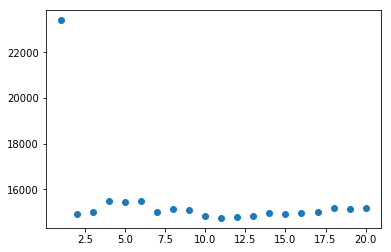

In [56]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm = 'brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mes = mean_squared_error(test_df['price'], predictions)
    mes_values.append(mes)
    
plt.scatter(hyper_params, mes_values)

# Cross Validation: using module or manually

### cross validation module

In [57]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

In [73]:
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    # online documents: the default n_neighbors is 5 for both KNeighborsRegress
    #  and KNeighborsClassifier
    mses = cross_val_score(model, dc_listing[['accommodates']], 
                dc_listing['price'], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(-1*mses)
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(fold, ' folds: ', 'avg-RMSES: ', str(avg_rmse), 'std-RMSES: ', 
         str(std_rmse))

3  folds:  avg-RMSES:  123.170643757 std-RMSES:  4.26893303599
5  folds:  avg-RMSES:  128.499315921 std-RMSES:  16.9789389088
7  folds:  avg-RMSES:  127.97513377 std-RMSES:  20.4954352705
9  folds:  avg-RMSES:  123.618726694 std-RMSES:  24.383915795
10  folds:  avg-RMSES:  127.147684521 std-RMSES:  24.1297108046
11  folds:  avg-RMSES:  127.61624299 std-RMSES:  29.3674088594
13  folds:  avg-RMSES:  122.748356555 std-RMSES:  32.3783522657
15  folds:  avg-RMSES:  122.757645401 std-RMSES:  32.893260161
17  folds:  avg-RMSES:  123.005053153 std-RMSES:  35.4887123794
19  folds:  avg-RMSES:  122.148212352 std-RMSES:  35.1736563994
21  folds:  avg-RMSES:  121.109422469 std-RMSES:  37.1157474467
23  folds:  avg-RMSES:  124.939858948 std-RMSES:  39.2787187113


### Cross validation manually

In [66]:
dc_listing.loc[dc_listing.index[0:745], 'fold'] = 1
dc_listing.loc[dc_listing.index[745:1490], 'fold'] = 2
dc_listing.loc[dc_listing.index[1490:2234], 'fold'] = 3
dc_listing.loc[dc_listing.index[2234:2978], 'fold'] = 4
dc_listing.loc[dc_listing.index[2978:3723], 'fold'] = 5

print(dc_listing['fold'].value_counts())
print('\n Num of missing values: ', dc_listing['fold'].isnull().sum())

2.0    745
1.0    745
4.0    744
3.0    744
5.0    693
Name: fold, dtype: int64

 Num of missing values:  0


In [68]:
folds = dc_listing['fold'].unique()

In [72]:
def train_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        model = KNeighborsRegressor()
        train = df[df['fold'] != fold]
        test = df[df['fold'] == fold].copy()
        model.fit(train[['accommodates']], train['price'])
        
        test['predicted'] = model.predict(test[['accommodates']])
        mse = mean_squared_error(test['price'], test['predicted'])
        rmse = mse**0.5
        fold_rmses.append(rmse)
    return fold_rmses

rmses = train_validate(dc_listing, folds)
print(rmses)
avg_rmse = np.mean(rmses)
print(avg_rmse)

[105.45600004887692, 140.22399894167413, 153.35961918216583, 131.31358347216434, 114.07989529633392]
128.886619388
